# Variational Autoencoder (VAE)

Useful links: 
* original paper http://arxiv.org/abs/1312.6114
* helpful article 
   * https://jmetzen.github.io/2015-11-27/vae.html   

In this seminalr we will train an autoencoder to model images of digits.

## Prepare the data

In [1]:
import numpy as np
import tqdm

image_h = 28
image_w = 28

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./')

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_gallery(images, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.5 * n_col, 1.7 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray, vmin=-1, vmax=1, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())

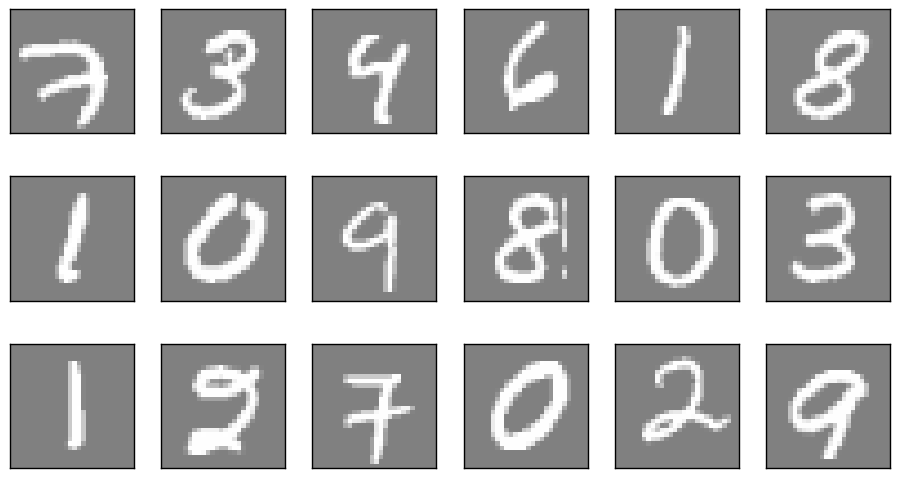

In [4]:
plot_gallery(mnist.train.images, image_h, image_w)

In [5]:
import tensorflow as tf

# Autoencoder

Why to use all this complicated formulaes and regularizations, what is the need for variational inference? To analyze the difference, let's first train just an autoencoder on the data:

<img src="Autoencoder_structure.png" alt="Autoencoder">

In [6]:
input_shape = [None, image_h*image_w]

input_X = tf.placeholder(tf.float32, shape=input_shape, name='input_X')

In [7]:
HU_encoder = 600 #you can play with this values
HU_decoder = 600
dimZ = 60 #considering digits reconstruction task, which size of representation seems reasonable?

# define the network
# use ReLU for hidden layers' activations
# XavierUniform initialization for W
# zero initialization for biases
# it's also convenient to put sigmoid activation on output layer to get nice normalized pics


with tf.variable_scope('encoder1'):
    W = tf.get_variable("W", shape=[input_shape[1], HU_encoder],
           initializer=tf.contrib.layers.xavier_initializer())
    
    b = tf.get_variable("b", shape=[HU_encoder])
    
    enc = tf.nn.elu(tf.matmul(input_X, W) + b)
    
with tf.variable_scope('encoder2'):
    W = tf.get_variable("W", shape=[HU_encoder, dimZ],
           initializer=tf.contrib.layers.xavier_initializer())
    
    b = tf.get_variable("b", shape=[dimZ])
    
    z = tf.matmul(enc, W) + b
    
with tf.variable_scope('decoder1'):
    W = tf.get_variable("W", shape=[dimZ, HU_decoder],
           initializer=tf.contrib.layers.xavier_initializer())
    
    b = tf.get_variable("b", shape=[HU_decoder])
    
    dec = tf.nn.elu(tf.matmul(z, W) + b)
    
with tf.variable_scope('decoder2'):
    W = tf.get_variable("W", shape=[HU_decoder, input_shape[1]],
           initializer=tf.contrib.layers.xavier_initializer())
    
    b = tf.get_variable("b", shape=[input_shape[1]])
    
    out = tf.nn.elu(tf.matmul(dec, W) + b)

In [8]:
# create loss function
loss = tf.reduce_mean(tf.square(input_X - out))

# create parameter update expressions
lr = tf.Variable(1e-3, dtype=tf.float32, name='lr')
optimizer = tf.train.AdamOptimizer(lr).minimize(loss)

In [9]:
def iterate_minibatches(inputs, batchsize, show=False):
    if show:
        for _ in tqdm.tqdm(range(0, inputs.num_examples, batchsize)):
            yield inputs.next_batch(batchsize)[0]
    else:
        for _ in range(0, inputs.num_examples, batchsize):
            yield inputs.next_batch(batchsize)[0]

In [81]:
train = tf.Variable(True)

if train:
    epsilon = tf.random_normal([1], name="epsilon")
else:
    epsilon = tf.Variable(0)

In [82]:
sess.run(epsilon, feed_dict={train: False})

array([-0.1384466], dtype=float32)

In [25]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

In [12]:
# train your autoencoder
# visualize progress in reconstruction and loss decay

epochs = 10
for epoch in range(epochs):
    print('Epoch %d' % (epoch + 1))
    total_loss = 0.
    iters = 0
    for x in iterate_minibatches(mnist.train, 128, show=True):
        _, c = sess.run([optimizer, loss], feed_dict={input_X: x})
        total_loss += c
        iters += 1
    print('Average loss on train: %.3f' % (total_loss / iters))
    total_loss = 0.
    iters = 0
    for x in iterate_minibatches(mnist.test, 128):
        _, c = sess.run([optimizer, loss], feed_dict={input_X: x})
        total_loss += c
        iters += 1
    print('Average loss on test: %.3f' % (total_loss / iters))

  2%|▏         | 8/430 [00:00<00:05, 74.28it/s]

Epoch 1


100%|██████████| 430/430 [00:05<00:00, 81.86it/s]


Average loss on train: 0.010


  2%|▏         | 9/430 [00:00<00:05, 81.28it/s]

Average loss on test: 0.010
Epoch 2


100%|██████████| 430/430 [00:05<00:00, 77.95it/s]


Average loss on train: 0.010


  2%|▏         | 8/430 [00:00<00:05, 78.17it/s]

Average loss on test: 0.010
Epoch 3


100%|██████████| 430/430 [00:05<00:00, 59.66it/s]


Average loss on train: 0.010


  2%|▏         | 8/430 [00:00<00:05, 76.42it/s]

Average loss on test: 0.009
Epoch 4


100%|██████████| 430/430 [00:06<00:00, 69.29it/s]


Average loss on train: 0.009


  2%|▏         | 8/430 [00:00<00:05, 74.41it/s]

Average loss on test: 0.009
Epoch 5


100%|██████████| 430/430 [00:06<00:00, 59.05it/s]


Average loss on train: 0.009


  2%|▏         | 8/430 [00:00<00:05, 74.02it/s]

Average loss on test: 0.008
Epoch 6


100%|██████████| 430/430 [00:05<00:00, 73.23it/s]


Average loss on train: 0.008


  2%|▏         | 8/430 [00:00<00:05, 77.03it/s]

Average loss on test: 0.008
Epoch 7


100%|██████████| 430/430 [00:05<00:00, 73.51it/s]


Average loss on train: 0.008


  2%|▏         | 8/430 [00:00<00:05, 78.11it/s]

Average loss on test: 0.008
Epoch 8


100%|██████████| 430/430 [00:05<00:00, 77.45it/s]


Average loss on train: 0.008


  2%|▏         | 8/430 [00:00<00:05, 76.33it/s]

Average loss on test: 0.007
Epoch 9


100%|██████████| 430/430 [00:06<00:00, 69.42it/s]


Average loss on train: 0.007


  2%|▏         | 8/430 [00:00<00:05, 76.15it/s]

Average loss on test: 0.007
Epoch 10


100%|██████████| 430/430 [00:05<00:00, 72.08it/s]


Average loss on train: 0.007
Average loss on test: 0.007


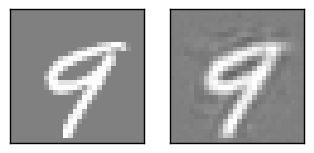

In [13]:
image = mnist.test.images[:1]
pred = sess.run(out, feed_dict={input_X: image})
plot_gallery([image, pred], image_h, image_w, n_row=1, n_col=2)

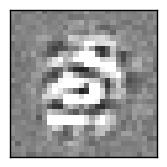

In [22]:
z_ = np.random.normal(scale=1e-2, size = [1, dimZ])
image = sess.run(out, feed_dict={z: z_})
plot_gallery([image], image_h, image_w, n_row=1, n_col=1)

# Variational Autoencoder

Bayesian approach in deep learning considers everything in terms of distributions. Now our encoder generates not just a vector $z$ but posterior ditribution q(z|x). Technically, the first difference is that you need to split bottleneck layer in two. One dense layer will generate vector $\mu$, and another will generate vector $\sigma$. Below you can see the example how to implement the reparametrization trick:

```python
with tf.name_scope("sample_gaussian"):
    # reparameterization trick
    epsilon = tf.random_normal(tf.shape(log_sigma), name="epsilon")
    return mu + epsilon * tf.exp(log_sigma) # N(mu, sigma**2)
```

Since our decoder is also a function that generates distribution, we need to do the same splitting for output layer. When testing the model we will look only on mean values, so one of the output will be actual autoencoder output.

In this homework we only ask for implementation of the simplest version of VAE - one $z$ sample per input.

In [ ]:
# to compare with conventional AE, keep these hyperparameters
# or change them for the values that you used before

HU_encoder = 600
HU_decoder = 600
dimZ = 6


And the last, but not least! Place in the code where the most of the formulaes goes to - optimization objective. The objective for VAE has it's own name - variational lowerbound. And as for any lowerbound our intention is to maximize it. Here it is (for one sample $z$ per input $x$):

$$\mathcal{L} = -KL(q_{\phi}(z|x)||p(z)) + \log p_{\theta}(x|z)$$

Your next task is to implement two functions that compute KL-divergence and the second term - log-likelihood of an output. Here is some necessary math for your convenience:

$$KL(q_\phi(z|x)|p(z)) = -\frac{1}{2}\sum_{i=1}^{dimZ}(1+log(\sigma_i^2)-\mu_i^2-\sigma_i^2)$$
$$\log p_{\theta}(x|z) = \sum_{i=1}^{dimX}\log p_{\theta}(x_i|z)=\sum_{i=1}^{dimX} \log \Big( \frac{1}{\sigma_i\sqrt{2\pi}}e^{-\frac{(\mu_I-x)^2}{2\sigma_i^2}} \Big)=...$$

Don't forget in the code that you are using $\log\sigma$ as variable. Explain, why not $\sigma$?

In [ ]:
def KL_divergence(mu, logsigma):
    return 0

def log_likelihood(x, mu, logsigma):
    return 0

Now build the loss and training function:

In [ ]:
# create prediction variable
# prediction =

# create loss function
# ...
# loss = KL_divergence(..., ...) - log_likelihood(..., ..., ...)

# create parameter update expressions
# optimizer = 

And train the model:

In [ ]:
# train your autoencoder
# visualize progress in reconstruction and loss decay

# Variational autoencoder with normalizing flows

Original paper: 

Now let us try to complicate our model with help of normalizing flows.

<img src="normflows.png" alt="Normalizing flows">

$$f(\mathbf{z}) = \mathbf{z} + \mathbf{u}h(\mathbf{w}^T\mathbf{z} + b)$$
$$|\det \frac{\partial f}{\partial \mathbf{z}}| = |1 + \mathbf{u}^Th'(\mathbf{w}^T\mathbf{z} + b)\mathbf{w}|$$

Lower bound in this case looks like

$$\mathcal{L} = \log p(x, z_k) - \log q_0(z_0) + \sum_{k = 1}^K \log |1 + u_k^Th'(w_k^Tz_{k-1} + b)w_k|$$